<a href="https://colab.research.google.com/github/CodeStriker7/comeback_code/blob/main/DBsetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 100
modellar = ['HP Pavilion', 'MacBook Air', 'HP Victus', 'MacBook Pro']
data_list = []

for _ in range(n):
    model = np.random.choice(modellar)
    ram = np.random.choice([8, 16, 32])

    if 'MacBook' in model:
        chip = np.random.choice(['M1', 'M2', 'M3'])
        hz = 120 if 'Pro' in model else 60
        base_price = 1000 + (int(chip[1]) * 200) # M1, M2, M3 ga qarab narx oshadi
    else:
        chip = np.random.choice(['Intel i5', 'Intel i7', 'Ryzen 5', 'Ryzen 7'])
        hz = 144 if 'Victus' in model else 60
        base_price = 500 + (200 if '7' in chip else 0)

    narx = base_price + (ram * 30) + (hz * 0.4) + np.random.randint(-50, 50)
    data_list.append([model, chip, ram, hz, narx])

df = pd.DataFrame(data_list, columns=['Model', 'Chip', 'RAM_GB', 'Ekran_Hz', 'Narxi_USD'])

# NaN va Duplicate qo'shish
df.loc[10:15, 'Narxi_USD'] = np.nan
df = pd.concat([df, df.iloc[[5, 5]]], ignore_index=True)

print("dataset:")
df.head(15)

dataset:


,Model,Chip,RAM_GB,Ekran_Hz,Narxi_USD
0,HP Victus,Ryzen 5,8,144,818.6
1,HP Pavilion,Ryzen 5,8,60,796.0
2,HP Victus,Ryzen 5,32,144,1554.6
3,HP Pavilion,Intel i7,32,60,1686.0
4,MacBook Air,M2,16,60,1855.0
5,MacBook Pro,M1,8,120,1513.0
6,MacBook Air,M1,16,60,1742.0
7,HP Pavilion,Ryzen 5,32,60,1475.0
8,MacBook Pro,M2,32,120,2419.0
9,HP Victus,Ryzen 5,16,144,1041.6


In [4]:
# 1. Takrorlanganlarni o'chirish
df = df.drop_duplicates()

df['Narxi_USD'] = df['Narxi_USD'].fillna(df.groupby('Chip')['Narxi_USD'].transform('mean'))

print("2-qadam: Tozalash yakunlandi (NaN qiymatlar yo'q):")
df.isnull().sum()

2-qadam: Tozalash yakunlandi (NaN qiymatlar yo'q):


,0
Model,0
Chip,0
RAM_GB,0
Ekran_Hz,0
Narxi_USD,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ['RAM_GB', 'Ekran_Hz', 'Narxi_USD']

df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df[cols])

# Skrinshotda chiroyli ko'rinishi uchun 2 ta raqamgacha yaxlitlash
df_scaled[cols] = df_scaled[cols].round(2)

print("3-qadam: Normalizatsiya qilingan (Yaxlitlangan) jadval:")
df_scaled.head(15)

3-qadam: Normalizatsiya qilingan (Yaxlitlangan) jadval:


,Model,Chip,RAM_GB,Ekran_Hz,Narxi_USD
0,HP Victus,Ryzen 5,-1.05,1.25,-1.31
1,HP Pavilion,Ryzen 5,-1.05,-1.01,-1.35
2,HP Victus,Ryzen 5,1.28,1.25,-0.01
3,HP Pavilion,Intel i7,1.28,-1.01,0.22
4,MacBook Air,M2,-0.28,-1.01,0.52
5,MacBook Pro,M1,-1.05,0.60,-0.08
6,MacBook Air,M1,-0.28,-1.01,0.32
7,HP Pavilion,Ryzen 5,1.28,-1.01,-0.15
8,MacBook Pro,M2,1.28,0.60,1.52
9,HP Victus,Ryzen 5,-0.28,1.25,-0.92


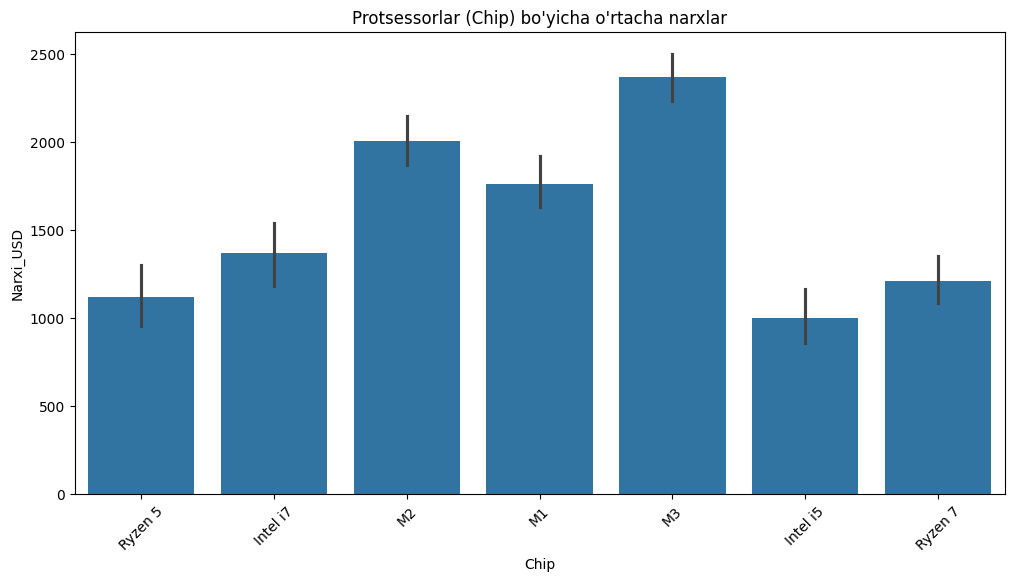

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Chip', y='Narxi_USD', data=df)
plt.title("Protsessorlar (Chip) bo'yicha o'rtacha narxlar")
plt.xticks(rotation=45)
plt.show()

# CSV saqlash
df_scaled.to_csv('noutbuklar_chip_data.csv', index=False)